# Project 3: Web API's & NLP

## Data Cleaning and EDA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

In [3]:
df = pd.read_csv('../data/reddit_data.csv')

In [4]:
df.shape

(10000, 5)

In [5]:
df.head()

,title,selftext,subreddit,id,y
0,How to sync controller after Xbox breaks down?,[removed],xboxone,k4t96k,0
1,Curious if using game sharing on the Xbox one ...,My brother lives in Massachusetts and I recent...,xboxone,k4t93z,0
2,Name Change: Untaken Name Unavailable,I was trying to transfer a name (from my secon...,xboxone,k4t7f8,0
3,Xbox game pass ultimate 14 day free trial codes,NaN,xboxone,k4t40s,0
4,Leaving Gamepass December 15,Leaving December 11\n\n* eFootball PES 2020 (C...,xboxone,k4sv6t,0


In [6]:
df.isnull().sum()

title           0
selftext     3110
subreddit       0
id              0
y               0
dtype: int64

Since I noticed right away that some cells in selftext column included [removed], I would need to deal with them along with the 3110 null values by combining title and selftext into one column 'text' as self text still included valuable data. 

In [7]:
len(df[df['selftext']=='[removed]'])

1339

In [8]:
df.fillna(' ', inplace=True)

In [9]:
df['selftext'].replace('[removed]', '', inplace=True)

In [10]:
df['text'] = df['title'].str.cat(df['selftext'], sep=" ")

In [11]:
df.head()

,title,selftext,subreddit,id,y,text
0,How to sync controller after Xbox breaks down?,,xboxone,k4t96k,0,How to sync controller after Xbox breaks down?
1,Curious if using game sharing on the Xbox one ...,My brother lives in Massachusetts and I recent...,xboxone,k4t93z,0,Curious if using game sharing on the Xbox one ...
2,Name Change: Untaken Name Unavailable,I was trying to transfer a name (from my secon...,xboxone,k4t7f8,0,Name Change: Untaken Name Unavailable I was tr...
3,Xbox game pass ultimate 14 day free trial codes,,xboxone,k4t40s,0,Xbox game pass ultimate 14 day free trial codes
4,Leaving Gamepass December 15,Leaving December 11\n\n* eFootball PES 2020 (C...,xboxone,k4sv6t,0,Leaving Gamepass December 15 Leaving December ...


Now that we have all the data we need, we can drop the remaining columns. 

In [12]:
df2 = df.drop(columns=['title','selftext', 'id'])

In [13]:
df2.head()

,subreddit,y,text
0,xboxone,0,How to sync controller after Xbox breaks down?
1,xboxone,0,Curious if using game sharing on the Xbox one ...
2,xboxone,0,Name Change: Untaken Name Unavailable I was tr...
3,xboxone,0,Xbox game pass ultimate 14 day free trial codes
4,xboxone,0,Leaving Gamepass December 15 Leaving December ...


In [14]:
df2.isnull().sum()

subreddit    0
y            0
text         0
dtype: int64

In [15]:
# Checking random row

df2['text'][1000]

'Audio problem Recently, I bought an Xbox from a friend. My old Xbox would not play audio through my monitor, but the new Xbox does. They are both Xbox one s models. Any idea how to only play volume through the headset and not the monitor?'

In [16]:
df2['text'][7000]

'PS4 slim turning off/crashes whenever opening game I start any game and it stays frozen for about 1:30 minutes then the TV says no signal but the console still has the white light on but then that shuts off aswell. Could this be the fan being to dirty/dusty or what? Any help is appreciated.'

This function will collect words only and lemmatize them. 

In [17]:
# Collect words only 

toke = RegexpTokenizer('\w+') 
lem = WordNetLemmatizer()     # lemmatize words

def text_prep(text):
    token = toke.tokenize(text.lower()) 
    stop = [word for word in token if not word in stopwords.words('english')]
    lemm = [lem.lemmatize(i) for i in stop]
    msg =" ".join(lemm)
    return msg

In [18]:
# Cleans review string, then appends to clean_posts.
posts_list = []

for row in range(len(df2)):
    posts_list.append(text_prep(df2['text'][row]))

In [23]:
df2.head()

,text,subreddit,y,text_length
0,How to sync controller after Xbox breaks down?,xboxone,0,47
1,Curious if using game sharing on the Xbox one ...,xboxone,0,461
2,Name Change: Untaken Name Unavailable I was tr...,xboxone,0,461
3,Xbox game pass ultimate 14 day free trial codes,xboxone,0,49
4,Leaving Gamepass December 15 Leaving December ...,xboxone,0,505


In [24]:
df2 = df2[['text', 'subreddit', 'y']]

In [25]:
df2.head()

,text,subreddit,y
0,How to sync controller after Xbox breaks down?,xboxone,0
1,Curious if using game sharing on the Xbox one ...,xboxone,0
2,Name Change: Untaken Name Unavailable I was tr...,xboxone,0
3,Xbox game pass ultimate 14 day free trial codes,xboxone,0
4,Leaving Gamepass December 15 Leaving December ...,xboxone,0


In [26]:
# create a text length column 
df2['text_length'] = df2['text'].map(len)

In [27]:
# create a word count in the text length column 
df2['text_word_count'] = df2['text'].map(lambda x: len(x.split()))

In [28]:
df2.head()

,text,subreddit,y,text_length,text_word_count
0,How to sync controller after Xbox breaks down?,xboxone,0,47,8
1,Curious if using game sharing on the Xbox one ...,xboxone,0,461,93
2,Name Change: Untaken Name Unavailable I was tr...,xboxone,0,461,87
3,Xbox game pass ultimate 14 day free trial codes,xboxone,0,49,9
4,Leaving Gamepass December 15 Leaving December ...,xboxone,0,505,70


In [29]:
df2.sort_values(by='text_word_count', ascending=True)[['text','text_word_count']].head()

,text,text_word_count
7960,VenturesForYou,1
945,Wolf-Kissed,1
7431,High,1
3558,Help!,1
3086,Modded,1


In [30]:
df2.sort_values(by='text_word_count', ascending=False)[['text','text_word_count']].head()

,text,text_word_count
8824,10 More Overlooked Single Player Indie Games [...,2765
1981,How good is Gamepass? A quantitative analysis ...,1274
7031,"Battlefield 6 Hello friends, how are you all?\...",1054
7994,Black Ops Cold War Review And Thoughts! &gt;! ...,907
3423,"One week with Xbox, my first impressions!!! \n...",893


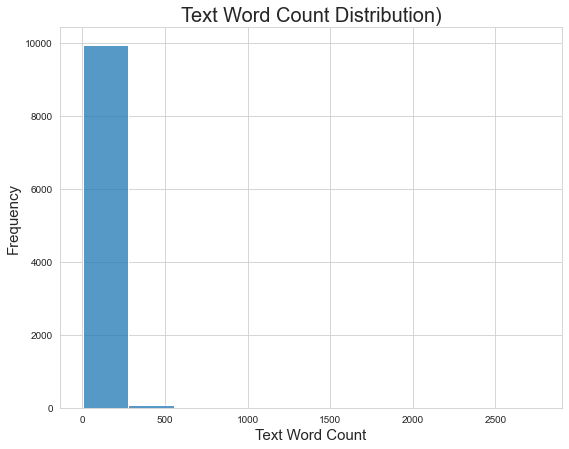

In [31]:
plt.figure(figsize=(9,7))
sns.histplot(df2['text_word_count'], kde=False, bins=10)
plt.ylabel("Frequency", size=15)
plt.title('Text Word Count Distribution)', size=20)
plt.xlabel("Text Word Count", size=15);

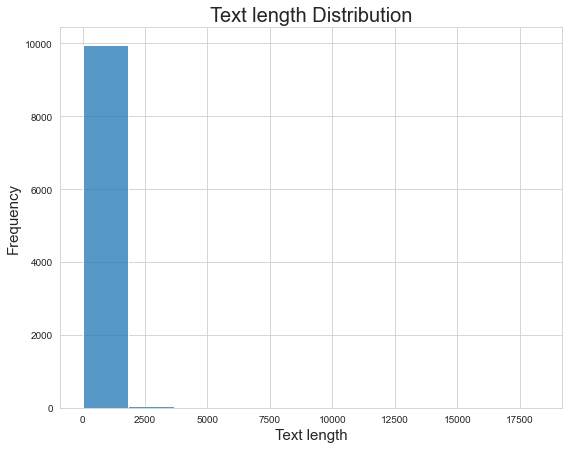

In [32]:
plt.figure(figsize=(9,7))
sns.histplot(df2['text_length'], bins=10)
plt.ylabel("Frequency", size=15)
plt.title('Text length Distribution', size=20)
plt.xlabel("Text length", size=15);

Both subreddits have the same text lenght distribution

In [33]:
PS4_mean = df2[df2['y'] == 1]['text_length'].mean()
XboxOne_mean = df2[df2['y'] == 0]['text_length'].mean()

In [34]:
print(f'PS4 text length mean count: {round(PS4_mean,2)}')
print(f'XboxOne text length mean count: {round(XboxOne_mean,2)}')

PS4 text length mean count: 270.83
XboxOne text length mean count: 221.96


In [35]:

xbox_mask = (df2['y'] == 0) & (df2['text_length'] < 5000)
ps_mask = (df2['y'] == 1) & (df2['text_length'] < 5000)

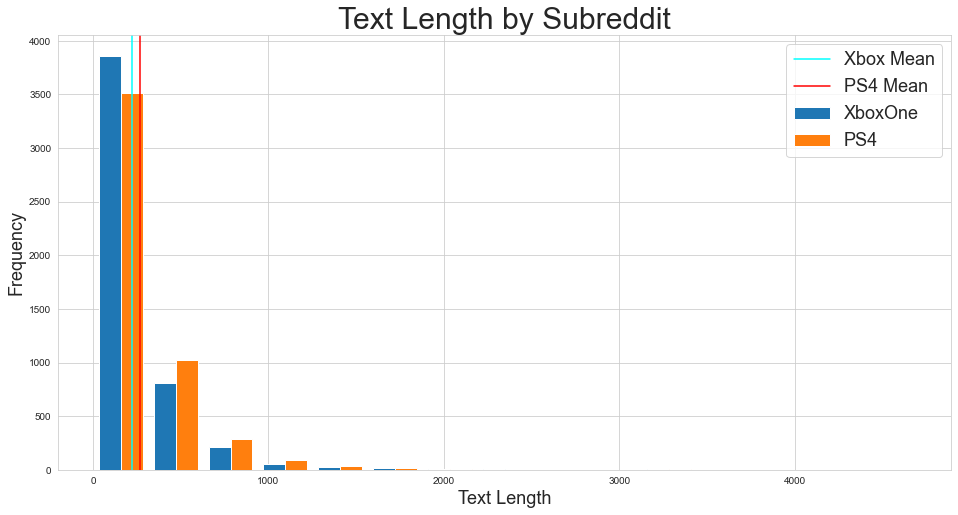

In [36]:

plt.figure(figsize=(16,8))
plt.hist([df2[xbox_mask]['text_length'], 
          df2[ps_mask]['text_length']],
         bins=15)
plt.title('Text Length by Subreddit', fontsize = 30)

# Character Count Mean - Relationship Advice 
plt.axvline(XboxOne_mean, color = '#00FFFF')

# Character Count Mean - Dating 
plt.axvline(PS4_mean, color = 'red')

plt.legend(['Xbox Mean', 'PS4 Mean', 'XboxOne', 'PS4'], fontsize = 18);

plt.xlabel('Text Length', fontsize = 18);
plt.ylabel('Frequency', fontsize = 18);

In [37]:
cv = CountVectorizer(stop_words='english', min_df=3)
cv.fit(df2['text'])

status_cv = cv.transform(df2['text'])
status_df = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

In [38]:
# 15 most common words
status_df.sum().sort_values(ascending=False).head(15)

xbox          4020
ps4           4008
game          3490
games         2662
just          2418
play          1756
controller    1655
help          1655
like          1569
new           1423
series        1398
ve            1395
know          1392
account       1188
got           1047
dtype: int64

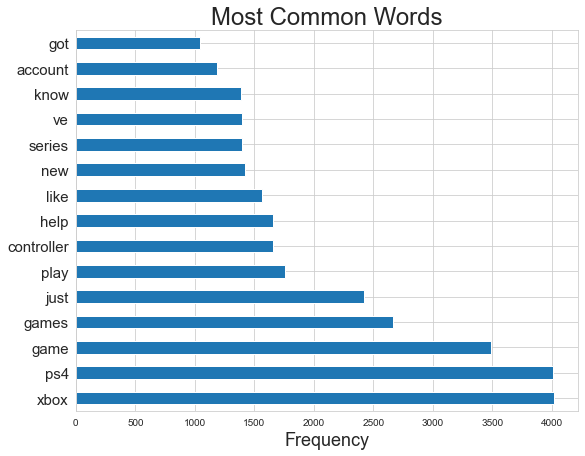

In [39]:
# 15 most common words frequency
plt.figure(figsize=(9,7))
plt.title('Most Common Words', size = 24)
plt.xlabel("Frequency", size=18)
plt.yticks(fontsize=15)
status_df.sum().sort_values(ascending=False).head(15).plot(kind='barh');

This graph presents us with the top 15 words used within the whole dataset. 

In [40]:
xbox = df2[df2['y'] == 0]

In [41]:
xbox.shape

(5000, 5)

In [42]:
cv = CountVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
cv.fit(xbox['text'])

status_cv = cv.transform(xbox['text'])
status_xbox = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

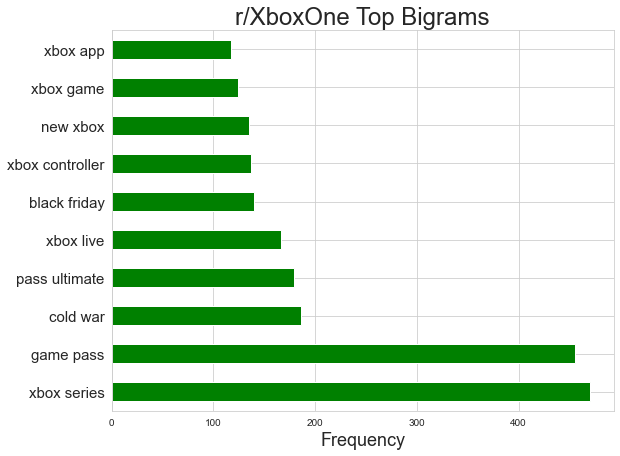

In [57]:
plt.figure(figsize=(9,7))
plt.title('r/XboxOne Top Bigrams', size = 24)
plt.xlabel("Frequency", size=18)
plt.yticks(fontsize=15)
status_xbox.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='green');

This graph shows the top 10 bigrams in xboxone subreddit. 

In [44]:
ps = df2[df2['y'] == 1]

In [45]:
cv = CountVectorizer(stop_words='english', min_df=3, )
cv.fit(ps['text'])

status_cv = cv.transform(ps['text'])
status_ps = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

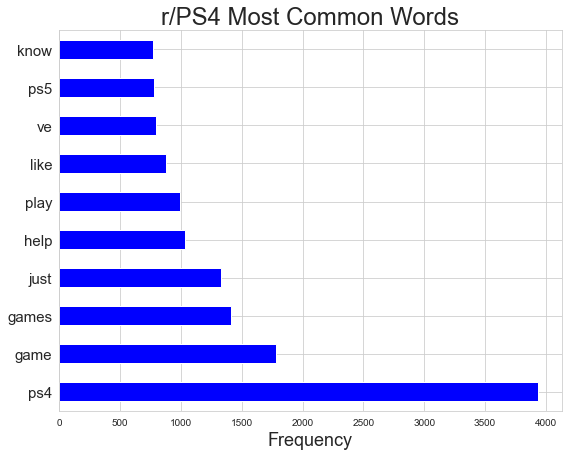

In [46]:
plt.figure(figsize=(9,7))
plt.title('r/PS4 Most Common Words', size = 24)
plt.xlabel("Frequency", size=18)
plt.yticks(fontsize=15)
status_ps.sum().sort_values(ascending=False).head(10).plot(kind='barh', color ='blue');

This graph is showing us the top 10 words in the PS4 subreddit. 

In [47]:
cv_2 = CountVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
cv_2.fit(xbox['text'])

status_cv2 = cv.transform(xbox['text'])
status_xbox2 = pd.DataFrame(status_cv.todense(), columns=cv.get_feature_names())

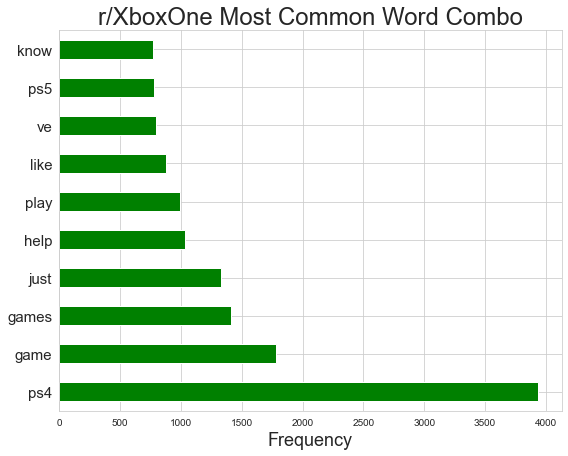

In [48]:
plt.figure(figsize=(9,7))
plt.title('r/XboxOne Most Common Word Combo', size = 24)
plt.xlabel("Frequency", size=18)
plt.yticks(fontsize=15)
status_xbox2.sum().sort_values(ascending=False).head(10).plot(kind='barh', color='green');

This graph is showing us the top 10 words in the XboxOne subreddit. 

In [61]:
cv3 = CountVectorizer(stop_words='english', min_df=3, ngram_range = (2,2))
cv3.fit(ps['text'])

status_cv2 = cv3.transform(ps['text'])
status_ps2 = pd.DataFrame(status_cv2.todense(), columns=cv3.get_feature_names())

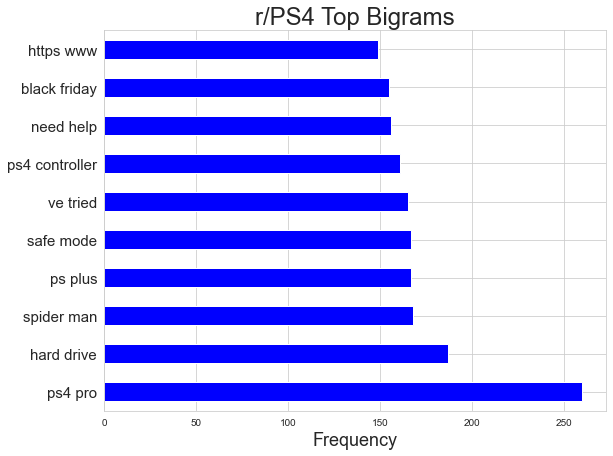

In [62]:
plt.figure(figsize=(9,7))
plt.title('r/PS4 Top Bigrams', size = 24)
plt.xlabel("Frequency", size=18)
plt.yticks(fontsize=15)
status_ps2.sum().sort_values(ascending=False).head(10).plot(kind='barh', color ='blue');

This graph shows the top 10 bigrams in PS4 subreddit. 

In [ ]:
# Save new dataframe to csv
#status_df.to_csv('reddit_data_clean2.csv', index=False)